True

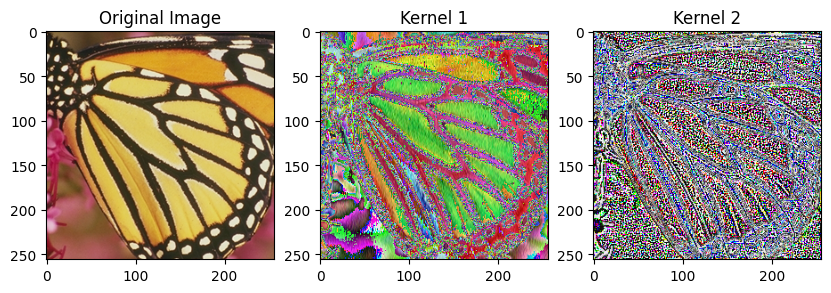

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def convolution2d(image, kernel):
    # Image is in RGB, we create the convolution for each channel
    kernel_row, kernel_col = kernel.shape
    image_row, image_col, image_dim = image.shape

    # Create a new image to store the convolved image
    output = np.zeros(image.shape)

    # Reflection padding for the image
    pad_height = kernel_row // 2
    pad_width = kernel_col // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='reflect')

    # Perform the convolution operation
    for dim in range(image_dim):
        for i in range(image_row):
            for j in range(image_col):
                output[i, j, dim] = np.sum(padded_image[i:i+kernel_row, j:j+kernel_col, dim]*kernel)

    # Convert to uint8 for displaying the image
    output = output.astype(np.uint8)

    # Return the convolved image
    return output

# Load the image
image = cv2.imread("butterfly.png")

# Define the kernels
kernel1 = np.array([[-1, 4, -1], [-1, 4, -1], [-1, 4, -1]])
kernel2 = np.array([[-1, 0, -1], [0, 4, 0], [-1, 0, -1]])

result1 = convolution2d(image, kernel1)
result2 = convolution2d(image, kernel2)

# Display the images using plt sub plot
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.title("Kernel 1")
plt.imshow(result1)
plt.subplot(133)
plt.title("Kernel 2")
plt.imshow(result2)

# Save the images
cv2.imwrite("result1.png", result1)
cv2.imwrite("result2.png", result2)